### Beispiel Perzeptron
Für ein linear trennbares Zweiklassenproblem sollen die Parameter des Perzeptronklassifikators gelernt werden. Dabei soll folgendes untersucht werden:
- Einfluss der Lernkonstanten $\alpha$
- Einfluss der Reihenfolge der Daten

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions.sda_help as sh

Populating the interactive namespace from numpy and matplotlib


### Aufgabe 3.8
Daten, Klassenbezeichnungen und Trennflächenparameter entsprechend Aufgabe 3.8 festlegen

In [2]:
X = pd.read_pickle('data/bsp_a3-8.txt').values[:,0:2]
X = np.insert(X, 0, values=1, axis=1)
y = pd.read_pickle('data/bsp_a3-8.txt').values[:,2]
w = np.array([0.0, 1.0, -1.0])

<Figure size 432x288 with 0 Axes>

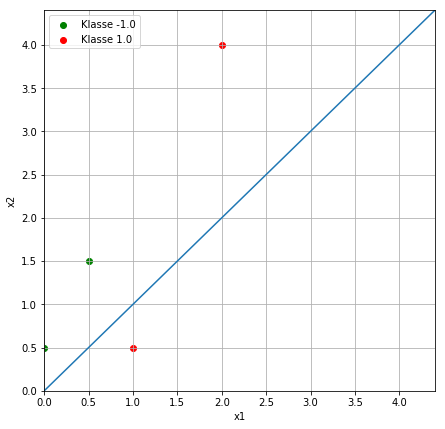

In [3]:
sh.show_res(X, y, w)

#### schrittweise Änderung
Datenpunkt, Klasse und Lernkonstante für Berechnung der neuen Trennfläche eingeben

In [7]:
d_korr = [0.5, 1.5]
cl = -1
alpha = 0.1

In [8]:
d_korr = np.append(1, d_korr)
w = w + 2 * alpha * d_korr * cl
print(w)

[ 0.   1.3 -0.5]


<Figure size 432x288 with 0 Axes>

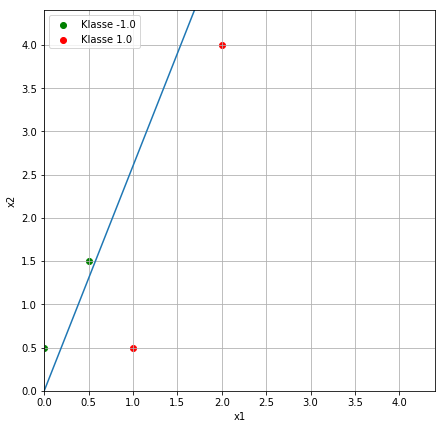

In [9]:
sh.show_res(X, y, w)

#### Iterative Berechnung:
- Lernstichprobe und Ergebnisvektor siehe oben
- Lernkonstante eingeben
- Anzahl der Iterationen eingeben
- Parametervektor festlegen

In [10]:
alpha = 0.1
n_iter = 20
w = np.array([0.0, 1.0, -1.0])

In [11]:
i, w = sh.perceptron(X, y, w, alpha, n_iter)

Iterationen bis Konvergenz:  1


<Figure size 432x288 with 0 Axes>

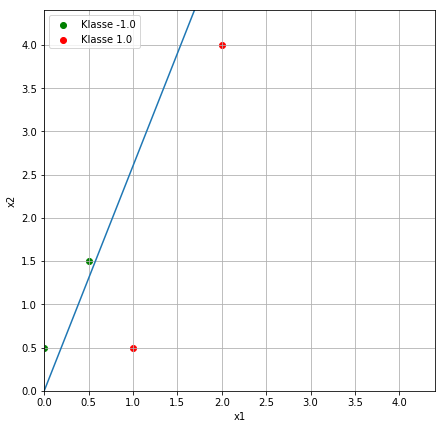

In [12]:
print('Iterationen bis Konvergenz: ', i)
sh.show_res(X, y, w)

### Beispiel 2
linear trennbarar Datensatz mit 20 Mustern pro Klasse

In [13]:
X = pd.read_pickle('data/df_perz.txt').values[:,0:2]
X = np.insert(X, 0, values=1, axis=1)
y = pd.read_pickle('data/df_perz.txt').values[:,2]

<Figure size 432x288 with 0 Axes>

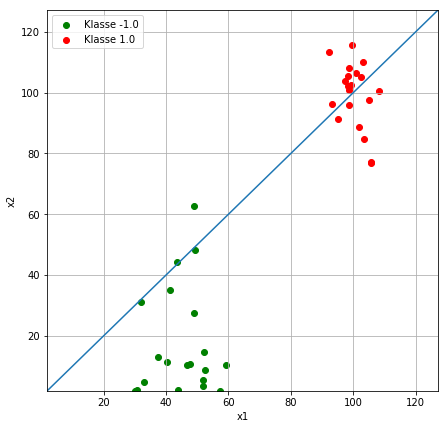

In [14]:
w = [0.0, 1.0, -1.0]
alpha = 0.1
n_iter = 2000
sh.show_res(X, y, w)

In [15]:
i, w = sh.perceptron(X, y, w, alpha, n_iter)

Iterationen bis Konvergenz:  1664


<Figure size 432x288 with 0 Axes>

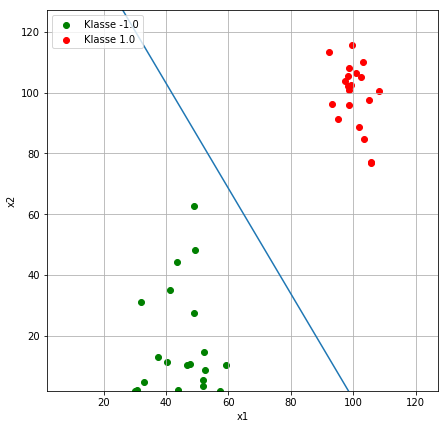

In [16]:
print('Iterationen bis Konvergenz: ', i)
sh.show_res(X, y, w)